In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
import h3
import folium
import osmnx as ox

In [2]:
from osmnx.features import features_from_address

In [3]:
address = 'Россия, Санкт-Петербург, Фрунзенский район'

tags = {'amenity' : True}

data_frunz = features_from_address(address, tags=tags)

In [4]:
lst = data_frunz.columns.tolist()

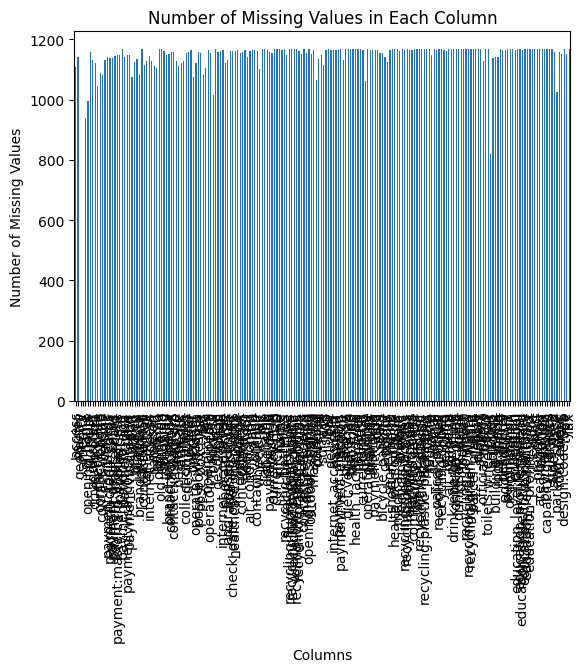

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
missing_values_count = data_frunz.isnull().sum()
missing_values_count.plot(kind='bar')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

Огромное кол-во пропусков в данных, профильтруем и возьмём где 10% пропусков. При тестах было выявлено что у других колонок минимум 80% пропусков в данных, поэтому эти данные не имеет смысл брать. 

In [6]:
missing_values_count = data_frunz.isnull().sum()

# Select columns with less than 10% missing values
columns_with_few_missing = missing_values_count[missing_values_count < len(data_frunz) * 0.1].index

# Select the columns from the original dataframe
df_filtered = data_frunz[columns_with_few_missing]

In [7]:
df_filtered.columns

Index(['geometry', 'amenity'], dtype='object')

In [8]:
df_filtered

geometry  \
element_type osmid                                                          
node         505178524                          POINT (30.39909 59.87514)   
             505178534                          POINT (30.40271 59.87301)   
             505178535                          POINT (30.40281 59.87304)   
             522606826                          POINT (30.40217 59.87335)   
             638466037                          POINT (30.39091 59.85819)   
...                                                                   ...   
relation     11865408   POLYGON ((30.38640 59.85706, 30.38633 59.85713...   
             11977027   POLYGON ((30.40385 59.85664, 30.40362 59.85685...   
             12228386   POLYGON ((30.40819 59.85757, 30.40767 59.85804...   
             12228389   POLYGON ((30.40734 59.85876, 30.40730 59.85879...   
             17086291   POLYGON ((30.39399 59.86467, 30.39423 59.86474...   

                             amenity  
element_type osmid                    
node         505178524           pub  
             505178534          cafe  
             505178535           pub  
             522606826      pharmacy  
             638466037    restaurant  
...                              ...  
relation     11865408        parking  
             11977027         school  
             12228386   kindergarten  
             12228389        parking  
             17086291         school  

[1169 rows x 2 columns]

Посмотрим рапределение объектов в Фрунзенском райное

In [9]:
df_filtered.groupby('amenity').count()

,geometry
amenity,
atm,24
bank,14
bar,2
bench,232
bicycle_parking,15
bicycle_rental,1
bureau_de_change,1
cafe,17
cinema,1


In [11]:
tags = {
    'amenity': True,
    'building': True,
    'highway': True,
    'natural': True,
    'place': True,
    'power': True,
    'tourism': True,
    'waterway': True
}

address = 'Россия, Санкт-Петербург, Фрунзенский район'

data_frunz_exp = features_from_address(address, tags=tags)

In [12]:
data_frunz_exp.columns.to_list()

['button_operated',
 'crossing',
 'highway',
 'tactile_paving',
 'traffic_signals:sound',
 'geometry',
 'kerb',
 'direction',
 'railway',
 'ref',
 'barrier',
 'foot',
 'vehicle',
 'bench',
 'bin',
 'bus',
 'lit',
 'name',
 'public_transport',
 'shelter',
 'trolleybus',
 'access',
 'amenity',
 'opening_hours',
 'addr:city',
 'addr:street',
 'drive_through',
 'check_date',
 'contact:phone',
 'contact:website',
 'cuisine',
 'payment:contactless',
 'payment:credit_cards',
 'payment:debit_cards',
 'payment:mastercard',
 'payment:mastercard_contactless',
 'payment:mir',
 'payment:mobile_app',
 'payment:visa',
 'payment:visa_contactless',
 'payment:visa_debit',
 'brand',
 'brand:en',
 'brand:ru',
 'brand:wikidata',
 'breakfast',
 'contact:email',
 'contact:vk',
 'internet_access',
 'level',
 'name:en',
 'name:ru',
 'old_name',
 'old_name:en',
 'smoking',
 'takeaway',
 'brand:wikipedia',
 'contact:facebook',
 'contact:instagram',
 'website',
 'design',
 'line_attachment',
 'line_management',
 

In [24]:
data_frunz_exp.isnull().sum()

button_operated          8194
crossing                 8121
highway                  3351
tactile_paving           8082
traffic_signals:sound    8223
                         ... 
name:postfix             8259
water                    8259
fax                      8259
salt                     8259
tidal                    8259
Length: 359, dtype: int64

In [25]:
missing_values_count = data_frunz_exp.isnull().sum()

# Select columns with less than 10% missing values
columns_with_few_missing = missing_values_count[missing_values_count < len(data_frunz_exp) * 0.9].index

# Select the columns from the original dataframe
df_filtered_exp = data_frunz_exp[columns_with_few_missing]

In [26]:
df_filtered_exp.columns

Index(['highway', 'geometry', 'amenity', 'natural', 'surface', 'nodes'], dtype='object')

In [27]:
df_filtered_exp.isnull().sum()

highway     3351
geometry       0
amenity     7091
natural     6809
surface     5978
nodes       3236
dtype: int64

In [28]:
df_filtered_exp['highway']

element_type  osmid   
node          26057021    traffic_signals
              26057036           crossing
              26057639    traffic_signals
              26057643    traffic_signals
              26057644    traffic_signals
                               ...       
relation      12228389                NaN
              15624408            footway
              15631409            footway
              16136145                NaN
              17086291                NaN
Name: highway, Length: 8260, dtype: object